In [1]:
import numpy as np
import pandas as pd

In [13]:
# Read in normalized data

Normalized_counts_save_dir = '/Volumes/Elements/20240122_Old_Young_serum_RNAseq_novogene/Results_Yuchen_MOR_BatchNormalization/1_Normalized_Counts/'
df = pd.read_excel(Normalized_counts_save_dir + '2_within_batch_normalized_after_MOR_counts_All_sample.xlsx')
df

,gene_id,MY1_1,MY1_2,MY1_3,MY1_ctrl,Fat_OM1_1,Fat_OM1_2,Fat_OM1_3,YF1_1,YF1_Ctrl,OF1_1,OF1_4,OF1_FY2_ctrl,OF2_1,OF2_2,OF2_4,OF2_ctrl,FY2_1,FY2_3
0,ENSG00000087086,1.034906e+06,920560.351240,923667.132850,514828.484689,506222.617538,469430.798675,441304.376441,629441.870732,514828.484689,625826.542059,533641.310531,514828.484689,499172.956678,544778.188922,497778.804657,514828.484689,565976.899287,539334.591277
1,ENSG00000099194,7.860097e+05,958943.083243,658599.379757,312867.290555,492861.786996,486142.272557,482794.054607,336605.437103,312867.290555,226629.491022,87592.731965,312867.290555,611347.561345,531065.780351,397920.823264,312867.290555,316966.107356,140824.799898
2,ENSG00000198886,5.924874e+05,520337.568320,404908.905409,309197.315191,164452.074042,195894.400865,216411.957415,351655.071169,309197.315191,271524.471492,143888.179384,309197.315191,275918.958806,201280.447951,226475.757907,309197.315191,268435.395858,165401.005001
3,ENSG00000198804,3.601900e+05,279863.603833,193319.666708,316432.695954,162376.050741,186662.158098,212873.432035,351732.246079,316432.695954,277352.813061,90376.646789,316432.695954,292818.040079,185533.624045,194335.546699,316432.695954,260828.287209,127088.223074
4,ENSG00000198763,1.922501e+05,192262.274492,197813.446258,209874.136475,112721.900213,103207.059574,91566.397825,212768.331437,209874.136475,180338.553125,124885.542483,209874.136475,182737.760805,161623.314291,192768.158383,209874.136475,176444.167009,121989.382717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58730,ENSG00000276351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58731,ENSG00000275661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58732,ENSG00000277856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58733,ENSG00000275063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The following codes are for preparing/reformating/filtering the counts dataframe for DESeq2 analysis pipeline

In [14]:
# re-format the dataframes to put gene_name as rownames (indexes)

def NameRows_Gene(df):
    df_data = df.iloc[: , 1:]
    df_label = df.iloc[:,0]
    df_data.index = df_label
    return df_data

df = NameRows_Gene(df)

In [15]:
df

,MY1_1,MY1_2,MY1_3,MY1_ctrl,Fat_OM1_1,Fat_OM1_2,Fat_OM1_3,YF1_1,YF1_Ctrl,OF1_1,OF1_4,OF1_FY2_ctrl,OF2_1,OF2_2,OF2_4,OF2_ctrl,FY2_1,FY2_3
gene_id,,,,,,,,,,,,,,,,,,
ENSG00000087086,1.034906e+06,920560.351240,923667.132850,514828.484689,506222.617538,469430.798675,441304.376441,629441.870732,514828.484689,625826.542059,533641.310531,514828.484689,499172.956678,544778.188922,497778.804657,514828.484689,565976.899287,539334.591277
ENSG00000099194,7.860097e+05,958943.083243,658599.379757,312867.290555,492861.786996,486142.272557,482794.054607,336605.437103,312867.290555,226629.491022,87592.731965,312867.290555,611347.561345,531065.780351,397920.823264,312867.290555,316966.107356,140824.799898
ENSG00000198886,5.924874e+05,520337.568320,404908.905409,309197.315191,164452.074042,195894.400865,216411.957415,351655.071169,309197.315191,271524.471492,143888.179384,309197.315191,275918.958806,201280.447951,226475.757907,309197.315191,268435.395858,165401.005001
ENSG00000198804,3.601900e+05,279863.603833,193319.666708,316432.695954,162376.050741,186662.158098,212873.432035,351732.246079,316432.695954,277352.813061,90376.646789,316432.695954,292818.040079,185533.624045,194335.546699,316432.695954,260828.287209,127088.223074
ENSG00000198763,1.922501e+05,192262.274492,197813.446258,209874.136475,112721.900213,103207.059574,91566.397825,212768.331437,209874.136475,180338.553125,124885.542483,209874.136475,182737.760805,161623.314291,192768.158383,209874.136475,176444.167009,121989.382717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000276351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000275661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000277856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Read in metadata

metadata = pd.read_excel(Normalized_counts_save_dir + 'metadata.xlsx')

In [16]:
metadata = NameRows_Gene(metadata)
metadata

,condition,sex,age,batch
Unnamed: 0,,,,
MY1_1,Male_Young,Male,Young,Batch_1
MY1_2,Male_Young,Male,Young,Batch_1
MY1_3,Male_Young,Male,Young,Batch_1
MY1_ctrl,Control,Control,Control,Batch_1
Fat_OM1_1,Male_Old,Male,Old,Batch_1
Fat_OM1_2,Male_Old,Male,Old,Batch_1
Fat_OM1_3,Male_Old,Male,Old,Batch_1
YF1_1,Female_Young,Female,Young,Batch_2
YF1_Ctrl,Control,Control,Control,Batch_2


In [17]:
# check whether gene_id is unique before proceeding to further analysis

duplicated_columns = df.columns[df.columns.duplicated()].unique()
print("Duplicated column names:", duplicated_columns)

Duplicated column names: Index([], dtype='object')


In [18]:
# Read in gene_info_df
counts_path = './1.Count/count_seperated_by_batch/'

gene_info_df = pd.read_excel(counts_path + 'gene_info.xlsx')
gene_info_df = NameRows_Gene(gene_info_df)
gene_info_df

,gene_name,gene_chr,gene_start,gene_end,gene_strand,gene_length,gene_biotype,gene_description,tf_family
gene_id,,,,,,,,,
ENSG00000087086,FTL,19,48965301,48966878,+,878,protein_coding,ferritin light chain [Source:HGNC Symbol;Acc:H...,-
ENSG00000099194,SCD,10,100347124,100364834,+,5362,protein_coding,stearoyl-CoA desaturase [Source:HGNC Symbol;Ac...,-
ENSG00000198886,MT-ND4,MT,10760,12137,+,1378,protein_coding,mitochondrially encoded NADH:ubiquinone oxidor...,-
ENSG00000198804,MT-CO1,MT,5904,7445,+,1542,protein_coding,mitochondrially encoded cytochrome c oxidase I...,-
ENSG00000198763,MT-ND2,MT,4470,5511,+,1042,protein_coding,mitochondrially encoded NADH:ubiquinone oxidor...,-
...,...,...,...,...,...,...,...,...,...
ENSG00000276351,RF01973,KI270721.1,52666,52734,+,69,misc_RNA,NaN,-
ENSG00000275661,RF01974,KI270721.1,52895,53010,+,116,misc_RNA,NaN,-
ENSG00000277856,AC233755.2,KI270726.1,26241,26534,+,294,protein_coding,NaN,-


In [19]:
# Only keep non-NaN genes for DESeq2 analysis

# Remove genes that have NaN counts in normalized counts df from gene_info_df
genes_to_keep = ~df.isna().any(axis=1)
gene_info_df = gene_info_df.loc[genes_to_keep]

# Remove genes that have NaN counts from normalized counts df
df = df.dropna()
df.to_excel(Normalized_counts_save_dir + '3_normalized_count_NaN_removed.xlsx')

df # Visualize 

,MY1_1,MY1_2,MY1_3,MY1_ctrl,Fat_OM1_1,Fat_OM1_2,Fat_OM1_3,YF1_1,YF1_Ctrl,OF1_1,OF1_4,OF1_FY2_ctrl,OF2_1,OF2_2,OF2_4,OF2_ctrl,FY2_1,FY2_3
gene_id,,,,,,,,,,,,,,,,,,
ENSG00000087086,1.034906e+06,920560.351240,923667.132850,514828.484689,506222.617538,469430.798675,441304.376441,629441.870732,514828.484689,625826.542059,533641.310531,514828.484689,499172.956678,544778.188922,497778.804657,514828.484689,565976.899287,539334.591277
ENSG00000099194,7.860097e+05,958943.083243,658599.379757,312867.290555,492861.786996,486142.272557,482794.054607,336605.437103,312867.290555,226629.491022,87592.731965,312867.290555,611347.561345,531065.780351,397920.823264,312867.290555,316966.107356,140824.799898
ENSG00000198886,5.924874e+05,520337.568320,404908.905409,309197.315191,164452.074042,195894.400865,216411.957415,351655.071169,309197.315191,271524.471492,143888.179384,309197.315191,275918.958806,201280.447951,226475.757907,309197.315191,268435.395858,165401.005001
ENSG00000198804,3.601900e+05,279863.603833,193319.666708,316432.695954,162376.050741,186662.158098,212873.432035,351732.246079,316432.695954,277352.813061,90376.646789,316432.695954,292818.040079,185533.624045,194335.546699,316432.695954,260828.287209,127088.223074
ENSG00000198763,1.922501e+05,192262.274492,197813.446258,209874.136475,112721.900213,103207.059574,91566.397825,212768.331437,209874.136475,180338.553125,124885.542483,209874.136475,182737.760805,161623.314291,192768.158383,209874.136475,176444.167009,121989.382717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000101282,0.000000e+00,0.000000,1.021621,1.064233,0.000000,1.020397,0.000000,1.725060,1.064233,0.000000,1.422912,1.064233,0.000000,0.000000,0.000000,1.064233,0.946362,1.119652
ENSG00000222421,0.000000e+00,0.000000,0.000000,1.804942,1.727101,1.730597,0.000000,0.000000,1.804942,0.000000,0.804421,1.804942,0.000000,0.000000,0.000000,1.804942,0.000000,0.000000
ENSG00000132832,0.000000e+00,0.000000,1.527866,1.591594,3.045907,0.000000,0.000000,0.000000,1.591594,0.000000,1.064005,1.591594,0.000000,0.000000,0.000000,1.591594,0.000000,0.000000


In [21]:
# Data re-formating for DESeq2

# Transpose counts matrix 
df = df.T

# Make sure there's no NaN in metadata
samples_to_keep = ~metadata.condition.isna()
df = df.loc[samples_to_keep]
metadata = metadata.loc[samples_to_keep]

In [22]:
df # transpose df to samples as rows and genes as columns

gene_id,ENSG00000087086,ENSG00000099194,ENSG00000198886,ENSG00000198804,ENSG00000198763,ENSG00000170323,ENSG00000198899,ENSG00000210082,ENSG00000130203,ENSG00000198888,...,ENSG00000237263,ENSG00000275139,ENSG00000162493,ENSG00000011083,ENSG00000265828,ENSG00000101282,ENSG00000222421,ENSG00000132832,ENSG00000281021,ENSG00000147571
MY1_1,1.034906e+06,786009.664770,592487.415655,360190.034177,192250.111353,156637.835630,223248.520365,64251.102795,106368.027884,130003.110560,...,1.754396,0.000000,2.098693,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MY1_2,9.205604e+05,958943.083243,520337.568320,279863.603833,192262.274492,147439.274965,189706.804239,46194.490979,106453.431397,107819.669974,...,6.052626,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MY1_3,9.236671e+05,658599.379757,404908.905409,193319.666708,197813.446258,144453.606155,137399.574487,26240.014755,108337.395944,103442.651900,...,0.000000,1.527866,0.000000,0.000000,0.000000,1.021621,0.000000,1.527866,0.000000,1.302247
MY1_ctrl,5.148285e+05,312867.290555,309197.315191,316432.695954,209874.136475,119901.836547,130667.625704,187238.776296,94602.570521,125968.494988,...,1.356563,1.591594,1.622786,1.534293,1.334881,1.064233,1.804942,1.591594,1.596678,1.356563
Fat_OM1_1,5.062226e+05,492861.786996,164452.074042,162376.050741,112721.900213,204378.402456,58322.913515,63991.178634,127963.751257,49360.818999,...,0.000000,0.000000,0.000000,0.000000,1.277312,0.000000,1.727101,3.045907,0.000000,0.000000
Fat_OM1_2,4.694308e+05,486142.272557,195894.400865,186662.158098,103207.059574,198737.935153,56623.653721,62430.508689,121198.395176,49713.291084,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.020397,1.730597,0.000000,0.000000,0.000000
Fat_OM1_3,4.413044e+05,482794.054607,216411.957415,212873.432035,91566.397825,175615.380338,53376.774751,52432.089198,119295.307116,42703.105984,...,0.000000,0.000000,0.000000,1.536869,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
YF1_1,6.294419e+05,336605.437103,351655.071169,351732.246079,212768.331437,113748.581066,144371.904052,160791.489225,126030.784981,127372.093824,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.725060,0.000000,0.000000,1.294062,0.000000
YF1_Ctrl,5.148285e+05,312867.290555,309197.315191,316432.695954,209874.136475,119901.836547,130667.625704,187238.776296,94602.570521,125968.494988,...,1.356563,1.591594,1.622786,1.534293,1.334881,1.064233,1.804942,1.591594,1.596678,1.356563
OF1_1,6.258265e+05,226629.491022,271524.471492,277352.813061,180338.553125,138406.284543,125697.530980,175786.401778,97455.648940,108530.669966,...,0.000000,0.000000,0.000000,0.000000,1.162612,0.000000,0.000000,0.000000,0.000000,0.000000


In [23]:
# Data filtering for DESeq2
# We filter out genes that have less than 10 counts in total (of all samples)

genes_to_keep = df.columns[df.sum(axis=0) >= 10]
counts_df = df[genes_to_keep]
gene_info_df = gene_info_df.T[genes_to_keep].T

print(f"{len(counts_df.columns)} genes are kept after data filtering; gene info file is also reduced to {len(gene_info_df.index)}")


16546 genes are kept after data filtering; gene info file is also reduced to 16546


In [162]:
gene_info_df.to_excel(Normalized_counts_save_dir + 'gene_info_noNaN.xlsx')

In [122]:
# Read in size factors from MOR normalization step
size_factors = np.loadtxt(Normalized_counts_save_dir + 'SizeFactor.csv', delimiter=',')

In [123]:
# Perform paired DEA with pydeseq2(version-0.4.1) on pre-normalized data (skip MOR normalization of DESeq2, since we have previously done it)

def Prenormed_Paired_DESeq2_Analysis(counts_df, metadata, gene_info, size_factors, design_factor, exp_condition, ref_condition, savedir):
    """
    IMPORTANT: this function can only be used when counts are pre-normalized. In this current use case, input counts are pre-normalized with first median of ratios, and then scaled to reduce biological batch effects of the chips
    
    This function puts several steps of DESeq2 pipeline together so that analysis of DEG across different conditions within a large dataset and be performed easier.
    
    This function returns stat_res.results_df before lfc shrinkage for LFC shrinkage and volcano plot.
    
    This function will save stat_res.results_df merged with gene info and normalized counts of each sample in the given savedir
    
    This function contains these following steps:
    a) Retrieve count/metadata of samples in the indicated comparison pair: exp_condition vs ref_condition
    b) New dataframes (count and metadata) that only contains samples that we wish to make comparison with will be used to construct dds
    c) Before proceeding to DESeq2, exp_condition and ref_condition will be modified: replacing "_" with "-"
    d) Constructing dds and perform DEA in a step-by-step manner
    e) Perform Wald test with default setting: LFC is divided by its standard error, resulting in a z-statistic, which is compared to a standard normal distribution.
    f) After P value determination, results_df of stat_res without LFC shrinkage will returned for further analysis
    g) On the other hand, 
    
    :param counts_df: is a dataframe that contains counts info have have no NaN (zero in counts_df will be filtered out before analysis)
    :param metadata: is a dataframe that contains metadata
    :param gene_info: is a dataframe that contains ensembl ID as indexes, other gene info, including gene symbols, in columns.
    :param size_factors: is a np.array that contains the size factors that were used in the median of ratio normalization step
    :param design_factor: is the factor that you want to make comparison on
    :param exp_condition: the experimental condtiion
    :param ref_condition: is one of the conditions in the coresponding design_factor that you wish to use as reference in comparison
    :param savedir: save directory
    
    :return: stat_res of pyDESeq2
    """
    from pydeseq2.dds import DeseqDataSet
    from pydeseq2.ds import DeseqStats
    
    # Find the samples that will not be used in this comparison
    drop_indexes = metadata.index[~metadata[design_factor].isin([exp_condition, ref_condition])].tolist()
    
    # Drop the not needed samples from counts_df and metadata
    counts_df_drop = counts_df.drop(drop_indexes, axis = 0)
    metadata_drop = metadata.drop(drop_indexes, axis=0)
    
    # Modify compared condition annotation to match with DESeq2 output
    exp_condition_modified = exp_condition.replace('_','-')
    ref_condition_modified = ref_condition.replace('_','-')
    
    # Make all datas are integers (round up to prevent making a non-zero count to zero)
    counts_df_drop_int = counts_df_drop.apply(np.ceil).astype(int)
    
    # Make sure that counts_df_drop and metadata_drop have the same group of indexes
    if counts_df_drop_int.index.equals(metadata_drop.index):
        # Proceed
        print('Proceeding to dds object construction')
    else: 
        print("Error: Indexes of compared counts_df_drop and metadata_drop are not identical.")
        return

    # Build DESeq2 object   
    dds = DeseqDataSet(
        counts=counts_df_drop_int,
        metadata=metadata_drop,
        design_factors=design_factor,
        ref_level=[design_factor, ref_condition_modified],
        refit_cooks=True,
        n_cpus=8,
    )
    
    # Select the size factors of the desired samples
    selected_size_factors_list = []
    for i in range(len(metadata.index)):
        if metadata.index[i] in drop_indexes:
            continue
        else:
            selected_size_factors_list.append(size_factors[i])
        
    selected_size_factors = np.array(selected_size_factors_list)
    
    # add previous normed_counts results to dds
    dds.layers['normed_counts'] = counts_df_drop
    dds.obsm['size_factors'] = selected_size_factors
    
    # Save normalized counts in dataframe for future use
    normalized_counts_df = pd.DataFrame(dds.layers['normed_counts'], columns=counts_df_drop.columns, index=counts_df_drop.index).T
    
    # Fit genewise dispersions
    dds.fit_genewise_dispersions()
    
    # Fit dispersion trend coefficients
    dds.fit_dispersion_trend()
    
    # Dispersion priors
    dds.fit_dispersion_prior()
    
    # MAP Dispersions
    dds.fit_MAP_dispersions()
    
    # Fit log fold changes (This lfc is stored in natural log scale, different from the output log2fc)
    dds.fit_LFC()
    
    # Calculate Cooks distances and refit
    dds.calculate_cooks()
    if dds.refit_cooks:
        # Replace outlier counts
        dds.refit()
        
    # Compute p-values and adjusted p-values with DeseqStats, which applies Wald tests to compute p-values
    stat_res = DeseqStats(dds, contrast=[design_factor, exp_condition_modified, ref_condition_modified], independent_filter=True)
    # Compute Wald test
    stat_res.summary()
    
    # Extract results_df from stat_res
    results_df = stat_res.results_df
    
    # Save a DESeq2 result file with gene_info, results_df, and normalized counts
    merged_df = pd.concat([gene_info, results_df, normalized_counts_df], axis=1)
    merged_df.to_excel(savedir + f'0_results_{exp_condition_modified}_vs_{ref_condition_modified}_before_LFC_shrinkage.xlsx')
    
    # Find significantly up/down/all regulated DEgenes
    up_DEG = merged_df[(merged_df['log2FoldChange']>=1)&(merged_df['padj']<=0.05)]
    down_DEG = merged_df[(merged_df['log2FoldChange']<=-1)&(merged_df['padj']<=0.05)]
    all_DEG = pd.concat([up_DEG, down_DEG], axis=0)
    
    up_DEG.to_excel(savedir + f'1_UP_DEGs_of_{exp_condition_modified}_vs_{ref_condition_modified}.xlsx')
    down_DEG.to_excel(savedir + f'2_DOWN_DEGs_of_{exp_condition_modified}_vs_{ref_condition_modified}.xlsx')
    all_DEG.to_excel(savedir + f'3_ALL_DEGs_of_{exp_condition_modified}_vs_{ref_condition_modified}.xlsx')
    
    return stat_res

In [124]:
# volcano plot plotting function for visualization of DEA results

def shrink_and_volcano(stat_res, gene_info, design_factor, exp_condition, ref_condition, savedir):
    """
    
    This function uses lfc_shrink() function of DESeq2 to perform LFC shrinkage and creates volcano plot out of it.
    Volcano plot will be plotted with the volcano_plot function right after this function, so always load the two volcano together
    
    :param res_df: results_df of stat_res before shrinkage
    :param gene_info: the gene_info dataframe for gene symbol annotation on volcano plot
    :param design_factor: is the factor that you want to make comparison on
    :param exp_condition: the experimental condtiion
    :param ref_condition: is one of the conditions in the coresponding design_factor that you wish to use as reference in comparison
    :param savedir: save directory
    
    :return: none
    """
    
    from pydeseq2.dds import DeseqDataSet
    from pydeseq2.ds import DeseqStats
    
    # Modify compared condition annotation to match with DESeq2 output
    exp_condition_modified = exp_condition.replace('_','-')
    ref_condition_modified = ref_condition.replace('_','-')
    
    # LFC shrinkage
    stat_res.lfc_shrink(coeff = f'{design_factor}_{exp_condition_modified}_vs_{ref_condition_modified}')
    shrunk_results_df = stat_res.results_df
    
    # Find significantly up/down/all regulated DEgenes in shrunk_results_df for volcano plot
    up_shrunk = shrunk_results_df[(shrunk_results_df['log2FoldChange']>=1)&(shrunk_results_df['padj']<=0.05)]
    down_shrunk = shrunk_results_df[(shrunk_results_df['log2FoldChange']<=-1)&(shrunk_results_df['padj']<=0.05)]
    
    # Draw volcano plot
    volcano_plot(shrunk_results_df, gene_info=gene_info,
                 save_dir = (savedir + f'volcano_plot_{exp_condition}_vs_{ref_condition}.pdf'))
    
    return

# volcano plot plotting function for visualization of DEA results

def volcano_plot(df, gene_info, save_dir):
    """
    Volcano plot for DESeq2 pipeline
    significance: log2FoldChange <= -1 / >= 1, padj <= 0.01
    Top 10 DE genes of each end are annotated
    """
    
    import matplotlib.pylab as plt
    import seaborn as sns
    from adjustText import adjust_text
    
    plt.figure(figsize=(8, 6))

    plt.scatter(x=df['log2FoldChange'],y=df['padj'].apply(lambda x:-np.log10(x)),s=3)

    # highlight down- or up- regulated genes
    down = df[(df['log2FoldChange']<=-1)&(df['padj']<=0.05)]
    up = df[(df['log2FoldChange']>=1)&(df['padj']<=0.05)]

    plt.scatter(x=down['log2FoldChange'],y=down['padj'].apply(lambda x:-np.log10(x)),s=5,color="blue")
    plt.scatter(x=up['log2FoldChange'],y=up['padj'].apply(lambda x:-np.log10(x)),s=5,color="red")
    
    # Select top 10 genes of each end for gene name annotation
    if len(down.index) >= 10:
        down_sorted = down.sort_values(by='padj', ascending=True)
        down_top_10 = down_sorted.head(10)
    else:
        down_top_10 = down
    
    if len(up.index) >= 10:
        up_sorted = up.sort_values(by='padj', ascending=True)
        up_top_10 = up_sorted.head(10)
    else:
        up_top_10 = up
    
    texts=[]
    for i,r in down_top_10.iterrows():
        texts.append(plt.text(x=r['log2FoldChange'],y=-np.log10(r['padj']),s=gene_info.loc[i,'gene_name']))
    for i,r in up_top_10.iterrows():
        texts.append(plt.text(x=r['log2FoldChange'],y=-np.log10(r['padj']),s=gene_info.loc[i,'gene_name']))
        
    if len(texts) > 0:
        adjust_text(texts,arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
    else:
        print('No significant DEG')
        
    plt.xlabel("log2FC")
    plt.ylabel("-logFDR")
    plt.axvline(-1,color="grey",linestyle="--")
    plt.axvline(1,color="grey",linestyle="--")
    plt.axhline(-np.log10(0.05),color="grey",linestyle="--")
    plt.savefig(save_dir)
    return

In [125]:
# deglist savedir of current analysis
deglist_savedir = '/Volumes/Elements/20240122_Old_Young_serum_RNAseq_novogene/Results_Yuchen_MOR_BatchNormalization/2_DESeq2/1_deglist/'

In [127]:
# build savedir for FY vs FO DEA results
FY_vs_FO_savedir = deglist_savedir + '1.FY_vs_FO/'

# Run DESeqAnalysis_Pipeline to compare FY vs FO
FY_vs_FO_stat_res = Prenormed_Paired_DESeq2_Analysis(counts_df=counts_df, 
                                                     metadata=metadata, 
                                                     gene_info=gene_info_df,
                                                     size_factors=size_factors,
                                                     design_factor='condition', 
                                                     exp_condition='Female_Young', 
                                                     ref_condition='Female_Old', 
                                                     savedir = FY_vs_FO_savedir)
FY_vs_FO_stat_res

Proceeding to dds object construction


/Users/skyhe/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pydeseq2/dds.py:257: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(
Fitting dispersions...
... done in 5.87 seconds.

Fitting dispersion trend curve...
... done in 3.70 seconds.

Fitting MAP dispersions...
... done in 4.67 seconds.

Fitting LFCs...
... done in 4.02 seconds.

Refitting 0 outliers.

Running Wald tests...


Log2 fold change & Wald test p-value: condition Female-Young vs Female-Old


... done in 1.08 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSG00000087086,554493.895518,0.074966,0.241000,0.311062,0.755754,0.998747
ENSG00000099194,331119.091538,-0.461105,0.594657,-0.775414,0.438095,0.998747
ENSG00000198886,238072.410946,0.243948,0.260202,0.937532,0.348485,0.982654
ENSG00000198804,222508.178379,0.282551,0.325846,0.867130,0.385871,0.990284
ENSG00000198763,169194.401281,0.024040,0.224655,0.107007,0.914783,0.998747
...,...,...,...,...,...,...
ENSG00000011083,0.433230,-0.206607,3.309622,-0.062426,0.950224,NaN
ENSG00000265828,0.434804,-2.673280,3.890156,-0.687191,0.491962,NaN
ENSG00000101282,0.651748,2.046629,2.830793,0.722988,0.469687,NaN


Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: condition Female-Young vs Female-Old


... done in 7.35 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSG00000087086,554493.895518,3.470737,0.397161,0.311062,0.755754,0.998747
ENSG00000099194,331119.091538,1.170518,0.653338,-0.775414,0.438095,0.998747
ENSG00000198886,238072.410946,2.795309,0.415278,0.937532,0.348485,0.982654
ENSG00000198804,222508.178379,2.199635,0.415446,0.867130,0.385871,0.990284
ENSG00000198763,169194.401281,2.002388,0.312823,0.107007,0.914783,0.998747
...,...,...,...,...,...,...
ENSG00000011083,0.433230,-0.000070,0.075320,-0.062426,0.950224,NaN
ENSG00000265828,0.434804,-0.000681,0.062390,-0.687191,0.491962,NaN
ENSG00000101282,0.651748,0.000842,0.099794,0.722988,0.469687,NaN


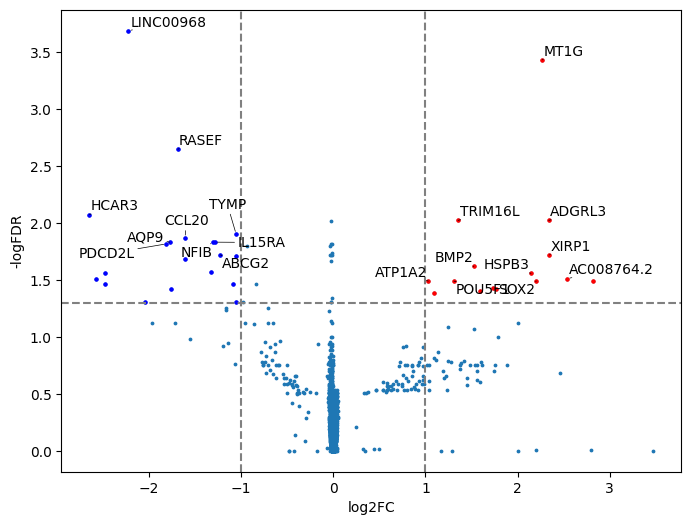

In [128]:
# FY_vs_FO shrink and volcano
shrink_and_volcano(FY_vs_FO_stat_res, gene_info=gene_info_df,
                   design_factor='condition', 
                   exp_condition='Female_Young', 
                   ref_condition='Female_Old', 
                   savedir = FY_vs_FO_savedir)

In [129]:
# build savedir for MY vs MO DEA results
MY_vs_MO_savedir = deglist_savedir + '2.MY_vs_MO/'

# Run DESeqAnalysis_Pipeline to compare FY vs FO
MY_vs_MO_stat_res = Prenormed_Paired_DESeq2_Analysis(counts_df=counts_df, 
                                                     metadata=metadata, 
                                                     gene_info=gene_info_df,
                                                     size_factors=size_factors,
                                                     design_factor='condition', 
                                                     exp_condition='Male_Young', 
                                                     ref_condition='Male_Old', 
                                                     savedir = MY_vs_MO_savedir)
MY_vs_MO_stat_res

Proceeding to dds object construction


/Users/skyhe/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pydeseq2/dds.py:257: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(
Fitting dispersions...
... done in 6.25 seconds.

Fitting dispersion trend curve...
... done in 3.66 seconds.

Fitting MAP dispersions...
... done in 4.84 seconds.

Fitting LFCs...
... done in 3.47 seconds.

Refitting 0 outliers.

Running Wald tests...


Log2 fold change & Wald test p-value: condition Male-Young vs Male-Old


... done in 1.14 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSG00000087086,716015.182806,1.079802,0.262588,4.112153,3.919856e-05,0.000584
ENSG00000099194,644225.040322,0.732668,0.237021,3.091147,1.993849e-03,0.015115
ENSG00000198886,349082.053618,1.456139,0.288858,5.041025,4.630441e-07,0.000012
ENSG00000198804,232547.490932,0.650448,0.319931,2.033086,4.204380e-02,0.152547
ENSG00000198763,148303.531619,0.961845,0.246755,3.897968,9.700304e-05,0.001276
...,...,...,...,...,...,...
ENSG00000011083,0.256145,-1.893042,4.323121,-0.437888,6.614676e-01,NaN
ENSG00000265828,0.212885,-1.835595,4.327883,-0.424132,6.714693e-01,NaN
ENSG00000101282,0.340336,0.007157,3.999814,0.001789,9.985723e-01,NaN


Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: condition Male-Young vs Male-Old


... done in 5.86 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSG00000087086,716015.182806,5.966329,0.548361,4.112153,3.919856e-05,0.000584
ENSG00000099194,644225.040322,3.422370,0.297081,3.091147,1.993849e-03,0.015115
ENSG00000198886,349082.053618,5.190857,0.499493,5.041025,4.630441e-07,0.000012
ENSG00000198804,232547.490932,3.818960,0.463655,2.033086,4.204380e-02,0.152547
ENSG00000198763,148303.531619,0.518148,0.233805,3.897968,9.700304e-05,0.001276
...,...,...,...,...,...,...
ENSG00000011083,0.256145,-0.041467,0.544361,-0.437888,6.614676e-01,NaN
ENSG00000265828,0.212885,-0.041132,0.544942,-0.424132,6.714693e-01,NaN
ENSG00000101282,0.340336,-0.000063,0.711359,0.001789,9.985723e-01,NaN


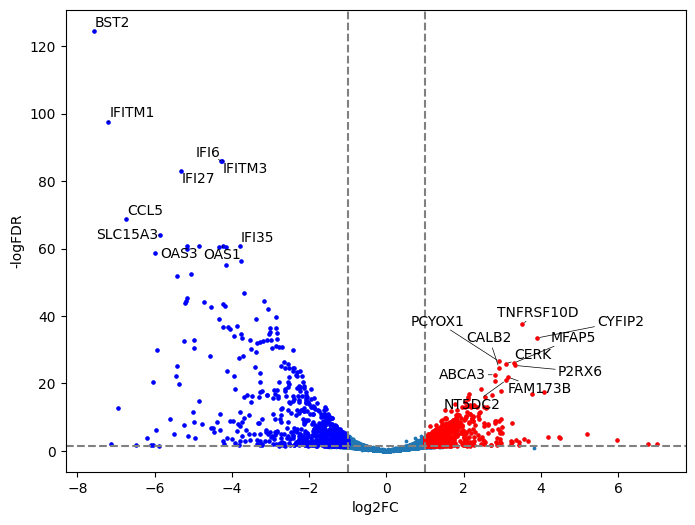

In [130]:
# MY_vs_MO shrinka and volcano
shrink_and_volcano(MY_vs_MO_stat_res, gene_info=gene_info_df,
                   design_factor='condition', 
                   exp_condition='Male_Young', 
                   ref_condition='Male_Old', 
                   savedir = MY_vs_MO_savedir)

In [131]:
# build savedir for FY vs MY DEA results
FY_vs_MY_savedir = deglist_savedir + '3.FY_vs_MY/'

# Run DESeqAnalysis_Pipeline to compare FY vs MY
FY_vs_MY_stat_res = Prenormed_Paired_DESeq2_Analysis(counts_df=counts_df, 
                                                     metadata=metadata, 
                                                     gene_info=gene_info_df,
                                                     size_factors=size_factors, 
                                                     design_factor='condition', 
                                                     exp_condition='Female_Young', 
                                                     ref_condition='Male_Young', 
                                                     savedir = FY_vs_MY_savedir)
FY_vs_MY_stat_res

Proceeding to dds object construction


/Users/skyhe/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pydeseq2/dds.py:257: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(
Fitting dispersions...
... done in 6.30 seconds.

Fitting dispersion trend curve...
... done in 3.99 seconds.

Fitting MAP dispersions...
... done in 5.17 seconds.

Fitting LFCs...
... done in 3.29 seconds.

Refitting 0 outliers.

Running Wald tests...


Log2 fold change & Wald test p-value: condition Female-Young vs Male-Young


... done in 1.28 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSG00000087086,768981.110913,-0.950660,0.284497,-3.341548,8.331260e-04,0.009382
ENSG00000099194,532991.412021,-1.798003,0.320940,-5.602299,2.115274e-08,0.000001
ENSG00000198886,383870.893569,-1.186772,0.336416,-3.527690,4.192033e-04,0.005491
ENSG00000198804,262170.343513,-0.434874,0.571154,-0.761395,4.464213e-01,0.675257
ENSG00000198763,182254.618877,-0.398400,0.289983,-1.373874,1.694808e-01,0.386490
...,...,...,...,...,...,...
ENSG00000011083,0.165475,1.674530,4.327551,0.386946,6.987959e-01,NaN
ENSG00000265828,0.000000,NaN,NaN,NaN,NaN,NaN
ENSG00000101282,0.802116,1.188762,2.667529,0.445642,6.558561e-01,NaN


Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: condition Female-Young vs Male-Young


... done in 6.33 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSG00000087086,768981.110913,2.729485,0.430428,-3.341548,8.331260e-04,0.009382
ENSG00000099194,532991.412021,1.608299,0.417173,-5.602299,2.115274e-08,0.000001
ENSG00000198886,383870.893569,1.836554,0.429202,-3.527690,4.192033e-04,0.005491
ENSG00000198804,262170.343513,1.311086,0.594230,-0.761395,4.464213e-01,0.675257
ENSG00000198763,182254.618877,-1.210916,0.298571,-1.373874,1.694808e-01,0.386490
...,...,...,...,...,...,...
ENSG00000011083,0.165475,0.031433,1.281693,0.386946,6.987959e-01,NaN
ENSG00000265828,0.000000,NaN,NaN,NaN,NaN,NaN
ENSG00000101282,0.802116,0.033128,0.756239,0.445642,6.558561e-01,NaN


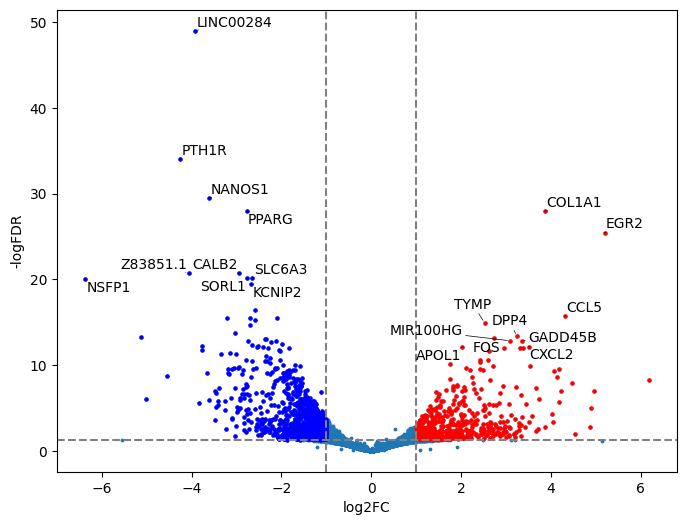

In [132]:
# FY_vs_MY shrink and volcano
shrink_and_volcano(FY_vs_MY_stat_res, gene_info=gene_info_df,
                   design_factor='condition', 
                   exp_condition='Female_Young', 
                   ref_condition='Male_Young', 
                   savedir = FY_vs_MY_savedir)

In [133]:
# build savedir for FO vs MO DEA results
FO_vs_MO_savedir = deglist_savedir + '4.FO_vs_MO/'

# Run DESeqAnalysis_Pipeline to compare FO vs MO
FO_vs_MO_stat_res = Prenormed_Paired_DESeq2_Analysis(counts_df=counts_df, 
                                                     metadata=metadata, 
                                                     gene_info=gene_info_df,
                                                     size_factors=size_factors, 
                                                     design_factor='condition', 
                                                     exp_condition='Female_Old', 
                                                     ref_condition='Male_Old', 
                                                     savedir = FO_vs_MO_savedir)
FO_vs_MO_stat_res

Proceeding to dds object construction


/Users/skyhe/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pydeseq2/dds.py:257: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(
Fitting dispersions...
... done in 6.29 seconds.

Fitting dispersion trend curve...
... done in 4.12 seconds.

Fitting MAP dispersions...
... done in 5.05 seconds.

Fitting LFCs...
... done in 3.00 seconds.

Refitting 0 outliers.

Running Wald tests...


Log2 fold change & Wald test p-value: condition Female-Old vs Male-Old


... done in 1.46 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSG00000087086,514769.449438,0.054176,0.227384,0.238257,0.811682,0.939089
ENSG00000099194,414544.312763,-0.604227,0.544625,-1.109438,0.267241,0.603164
ENSG00000198886,211980.780983,0.025420,0.213014,0.119334,0.905011,0.971776
ENSG00000198804,200291.038943,-0.066972,0.270325,-0.247748,0.804330,0.935825
ENSG00000198763,143731.085837,0.539406,0.181766,2.967586,0.003001,0.042346
...,...,...,...,...,...,...
ENSG00000011083,0.501232,-0.010352,3.255885,-0.003179,0.997463,NaN
ENSG00000265828,0.594468,0.668572,2.819601,0.237116,0.812567,NaN
ENSG00000101282,0.305414,-0.846128,3.630096,-0.233087,0.815694,NaN


Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: condition Female-Old vs Male-Old


... done in 6.82 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSG00000087086,514769.449438,5.294621,0.445102,0.238257,0.811682,0.939089
ENSG00000099194,414544.312763,1.794612,0.413909,-1.109438,0.267241,0.603164
ENSG00000198886,211980.780983,-0.692109,0.244952,0.119334,0.905011,0.971776
ENSG00000198804,200291.038943,0.420427,0.274578,-0.247748,0.804330,0.935825
ENSG00000198763,143731.085837,0.513072,0.177376,2.967586,0.003001,0.042346
...,...,...,...,...,...,...
ENSG00000011083,0.501232,-0.000152,0.496637,-0.003179,0.997463,NaN
ENSG00000265828,0.594468,0.007409,0.560952,0.237116,0.812567,NaN
ENSG00000101282,0.305414,-0.003822,0.450696,-0.233087,0.815694,NaN


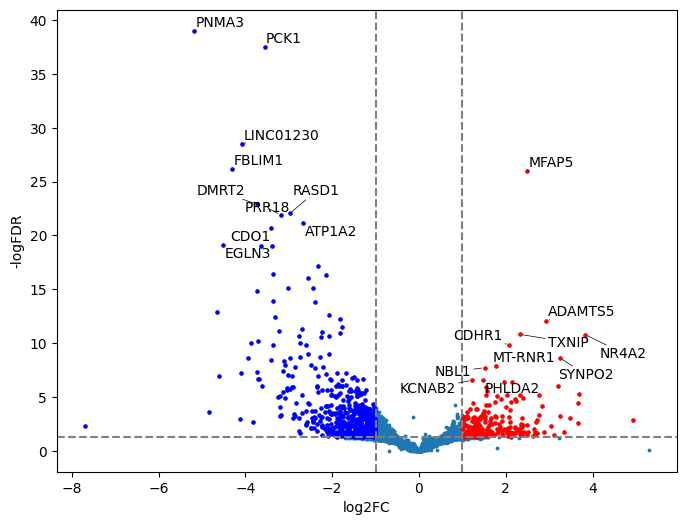

In [134]:
# FO_vs_MO shrink and volcano
shrink_and_volcano(FO_vs_MO_stat_res, gene_info=gene_info_df,
                   design_factor='condition', 
                   exp_condition='Female_Old', 
                   ref_condition='Male_Old', 
                   savedir = FO_vs_MO_savedir)

In [135]:
# build savedir for Female vs Male DEA results
Female_vs_Male_savedir = deglist_savedir + '5.Female_vs_Male/'

# Run DESeqAnalysis_Pipeline to compare FY vs MY
Female_vs_Male_stat_res = Prenormed_Paired_DESeq2_Analysis(counts_df=counts_df, 
                                                     metadata=metadata, 
                                                     gene_info=gene_info_df,
                                                     size_factors=size_factors,
                                                     design_factor='sex', 
                                                     exp_condition='Female', 
                                                     ref_condition='Male', 
                                                     savedir = Female_vs_Male_savedir)
Female_vs_Male_stat_res

Proceeding to dds object construction


Fitting dispersions...
... done in 7.04 seconds.

Fitting dispersion trend curve...
... done in 4.01 seconds.

Fitting MAP dispersions...
... done in 5.62 seconds.

Fitting LFCs...
... done in 2.99 seconds.

Refitting 28 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.03 seconds.

Fitting LFCs...
... done in 0.03 seconds.

Running Wald tests...


Log2 fold change & Wald test p-value: sex Female vs Male


... done in 1.20 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSG00000087086,623717.304356,-0.555904,0.243084,-2.286881,0.022203,0.103136
ENSG00000099194,465307.355302,-1.172742,0.310046,-3.782482,0.000155,0.002981
ENSG00000198886,285647.972091,-0.782680,0.289976,-2.699125,0.006952,0.046466
ENSG00000198804,226810.740902,-0.316011,0.272138,-1.161215,0.245554,0.472611
ENSG00000198763,160241.171426,-0.011170,0.222736,-0.050149,0.960004,0.983113
...,...,...,...,...,...,...
ENSG00000011083,0.357336,0.847527,2.413615,0.351144,0.725480,NaN
ENSG00000265828,0.339696,0.866327,2.631510,0.329213,0.741995,NaN
ENSG00000101282,0.518286,0.367659,1.976653,0.186001,0.852444,NaN


Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: sex Female vs Male


... done in 6.75 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSG00000087086,623717.304356,2.398236,0.267412,-2.286881,0.022203,0.103136
ENSG00000099194,465307.355302,1.482517,0.292609,-3.782482,0.000155,0.002981
ENSG00000198886,285647.972091,1.515242,0.313104,-2.699125,0.006952,0.046466
ENSG00000198804,226810.740902,2.225279,0.281748,-1.161215,0.245554,0.472611
ENSG00000198763,160241.171426,1.401083,0.260021,-0.050149,0.960004,0.983113
...,...,...,...,...,...,...
ENSG00000011083,0.357336,0.017465,0.605032,0.351144,0.725480,NaN
ENSG00000265828,0.339696,0.015637,0.618076,0.329213,0.741995,NaN
ENSG00000101282,0.518286,0.010638,0.539128,0.186001,0.852444,NaN


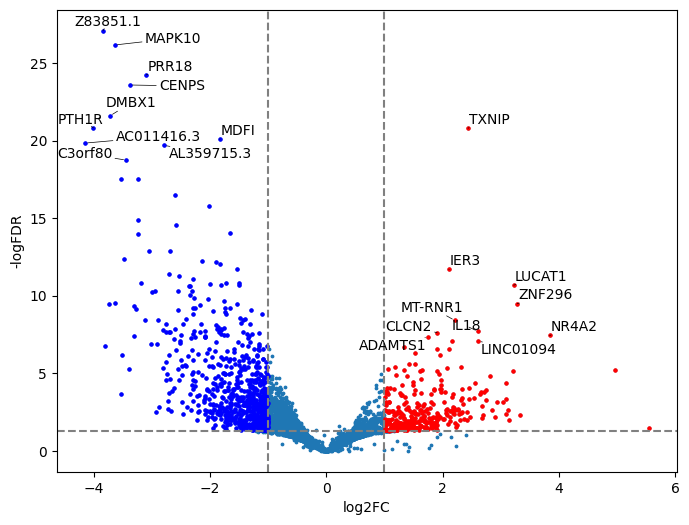

In [136]:
# Female_vs_Male shrink and volcano
shrink_and_volcano(Female_vs_Male_stat_res, gene_info=gene_info_df,
                   design_factor='sex', 
                   exp_condition='Female', 
                   ref_condition='Male', 
                   savedir = Female_vs_Male_savedir)

In [137]:
# build savedir for Young vs Old DEA results
Young_vs_Old_savedir = deglist_savedir + '6.Young_vs_Old/'

# Run DESeqAnalysis_Pipeline to compare FY vs MY
Young_vs_Old_stat_res = Prenormed_Paired_DESeq2_Analysis(counts_df=counts_df, 
                                                     metadata=metadata, 
                                                     gene_info=gene_info_df,
                                                     size_factors=size_factors,
                                                     design_factor='age', 
                                                     exp_condition='Young', 
                                                     ref_condition='Old', 
                                                     savedir = Young_vs_Old_savedir)
Young_vs_Old_stat_res

Proceeding to dds object construction


Fitting dispersions...
... done in 7.41 seconds.

Fitting dispersion trend curve...
... done in 3.98 seconds.

Fitting MAP dispersions...
... done in 5.72 seconds.

Fitting LFCs...
... done in 3.63 seconds.

Refitting 38 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.04 seconds.

Fitting MAP dispersions...
... done in 0.04 seconds.

Fitting LFCs...
... done in 0.03 seconds.

Running Wald tests...


Log2 fold change & Wald test p-value: age Young vs Old


... done in 1.19 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSG00000087086,623717.304356,0.647301,0.234655,2.758517,0.005806,0.065064
ENSG00000099194,465307.355302,0.444467,0.471470,0.942726,0.345821,0.643870
ENSG00000198886,285647.972091,0.965551,0.269161,3.587264,0.000334,0.010121
ENSG00000198804,226810.740902,0.490830,0.264057,1.858805,0.063055,0.269474
ENSG00000198763,160241.171426,0.416428,0.202970,2.051675,0.040201,0.208813
...,...,...,...,...,...,...
ENSG00000011083,0.357336,-1.008399,2.512613,-0.401335,0.688174,NaN
ENSG00000265828,0.339696,-2.374125,2.876013,-0.825492,0.409092,NaN
ENSG00000101282,0.518286,1.128829,2.027923,0.556643,0.577771,NaN


Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: age Young vs Old


... done in 6.23 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSG00000087086,623717.304356,3.226111,0.256001,2.758517,0.005806,0.065064
ENSG00000099194,465307.355302,1.797794,0.409414,0.942726,0.345821,0.643870
ENSG00000198886,285647.972091,2.917602,0.287109,3.587264,0.000334,0.010121
ENSG00000198804,226810.740902,2.379631,0.313676,1.858805,0.063055,0.269474
ENSG00000198763,160241.171426,1.824134,0.275611,2.051675,0.040201,0.208813
...,...,...,...,...,...,...
ENSG00000011083,0.357336,-0.009079,0.268065,-0.401335,0.688174,NaN
ENSG00000265828,0.339696,-0.018143,0.237004,-0.825492,0.409092,NaN
ENSG00000101282,0.518286,0.013167,0.346688,0.556643,0.577771,NaN


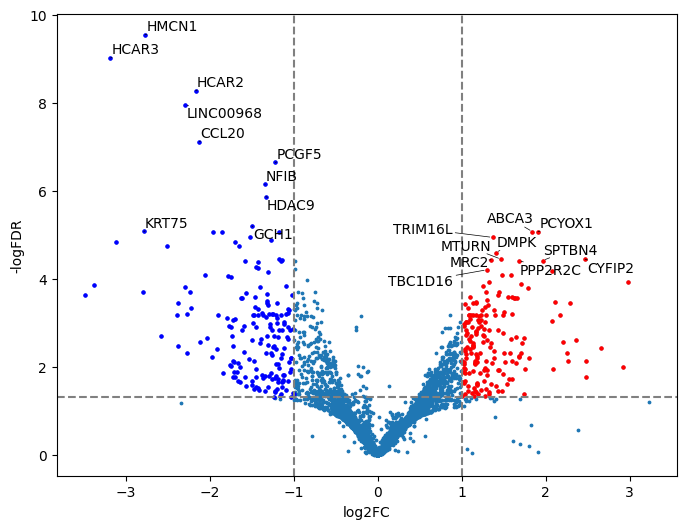

In [138]:
# Young_vs_Old shrink and volcano
shrink_and_volcano(Young_vs_Old_stat_res, gene_info=gene_info_df,
                   design_factor='age', 
                   exp_condition='Young', 
                   ref_condition='Old', 
                   savedir = Young_vs_Old_savedir)